In [1]:
import matplotlib.pyplot as plt
from src.data_functions import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

In [2]:
X_0 = np.load(path.join("gen_data", "ECG_normal.npy"))
X_1 = np.load(path.join("gen_data", "ECG_apnea.npy"))

In [4]:
ECG_sig, _ = get_patients_ECG([2])
SpO2_sig, _ = get_patients_SpO2([2])

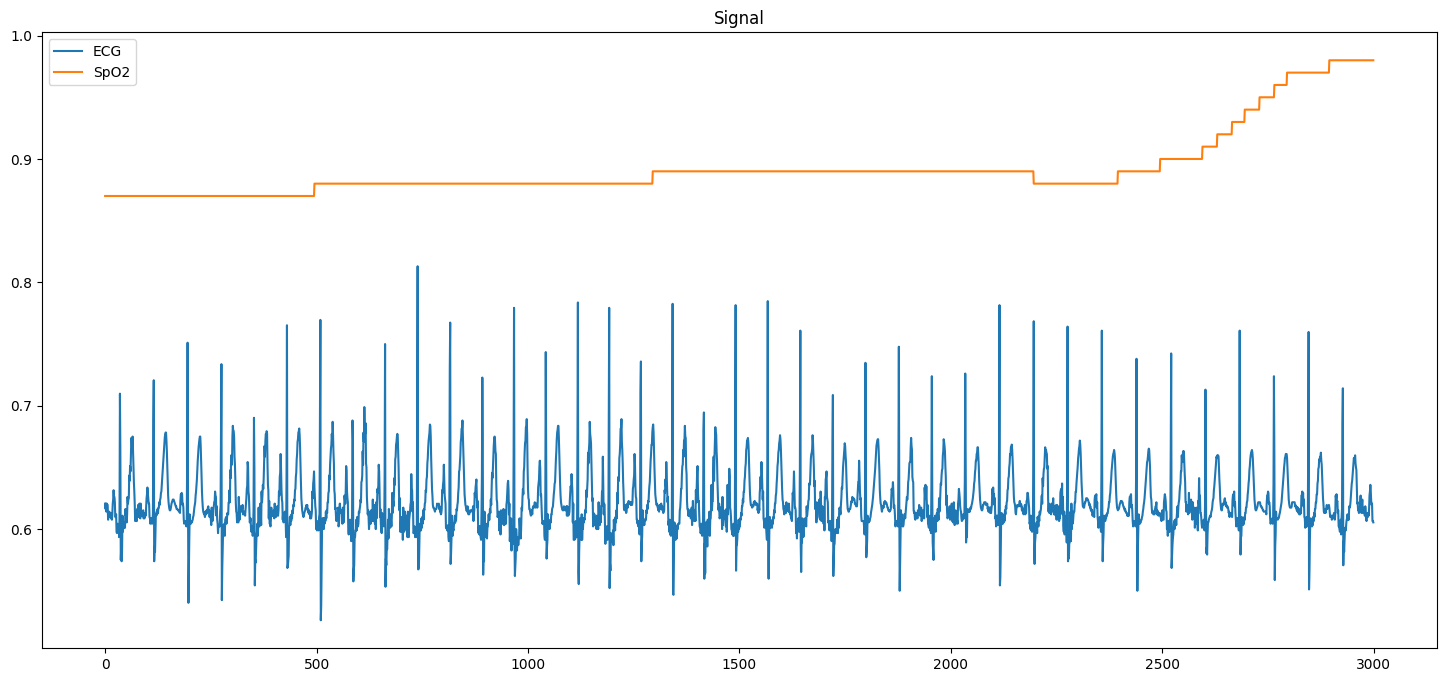

In [15]:
plt.figure(figsize=(18, 8))
plt.title("Signal")
plt.plot(ECG_sig[1][:3000:], label="ECG")
plt.plot(SpO2_sig.flatten()[:3000:], label="SpO2")
plt.legend()
plt.show()

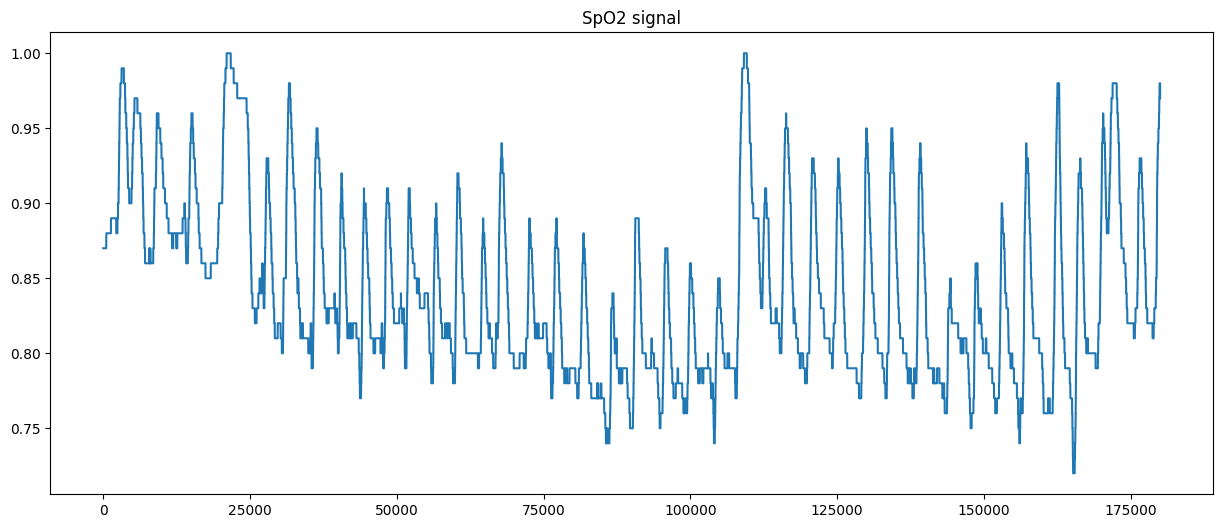

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(SpO2_sig.flatten()[:180000:])
plt.title("SpO2 signal")
plt.show()

In [123]:
embedding_matrix = [[], [], []] 
embedding_matrix[0] = np.random.normal(1.0, 0.00, (60, 100))
embedding_matrix[1] = np.random.normal(1.0, 0.1, (60, 100))
embedding_matrix[2] = np.random.normal(1.0, 0., (60, 100))
def to_color(sig):
    im = sig.reshape(60, len(sig) // 60)
    scaler = MinMaxScaler()
    out_im = np.stack([
        scaler.fit_transform(im * embedding_matrix[0]) * 255.0,
        scaler.fit_transform(im * embedding_matrix[1]) * 255.0,
        scaler.fit_transform(im * embedding_matrix[2]) * 255.0,
    ], axis=2).astype(np.uint8)
    return out_im

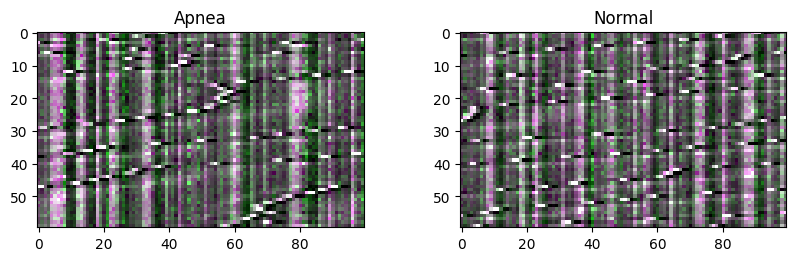

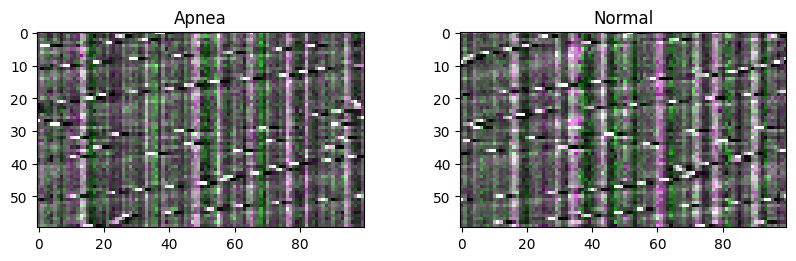

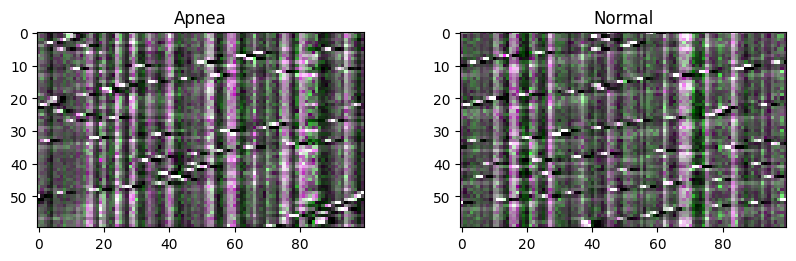

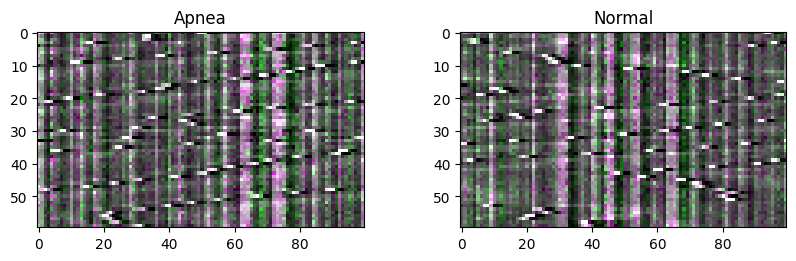

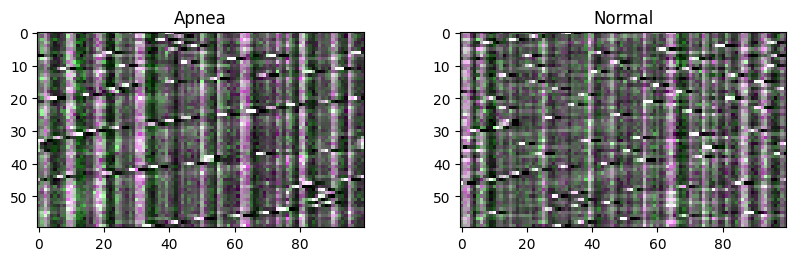

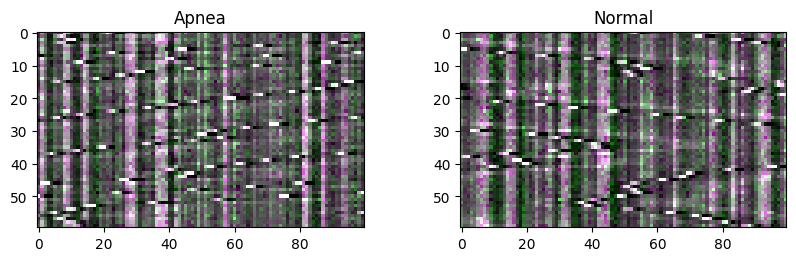

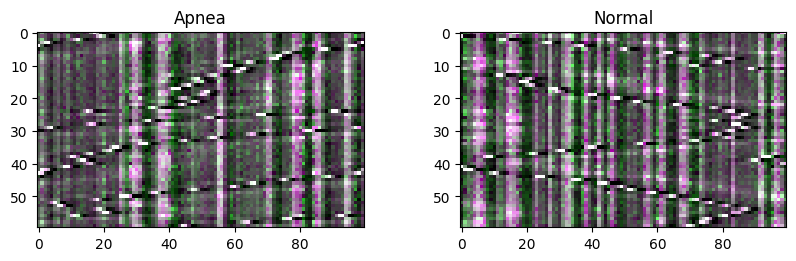

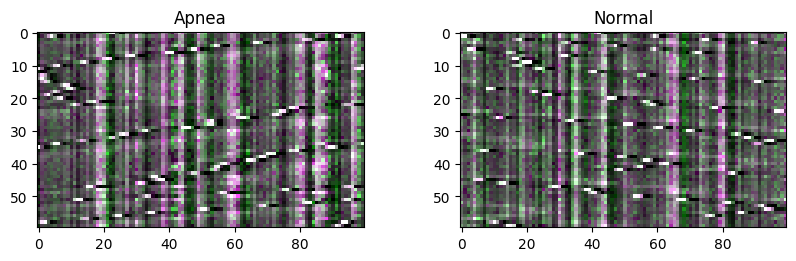

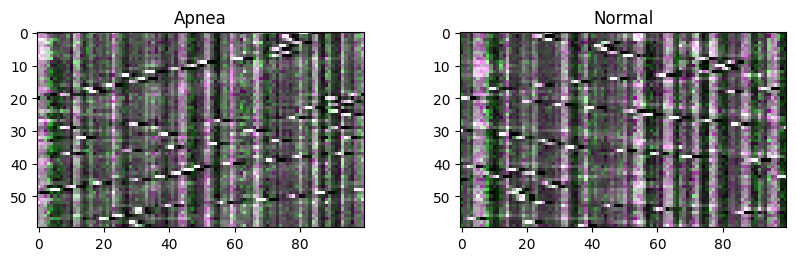

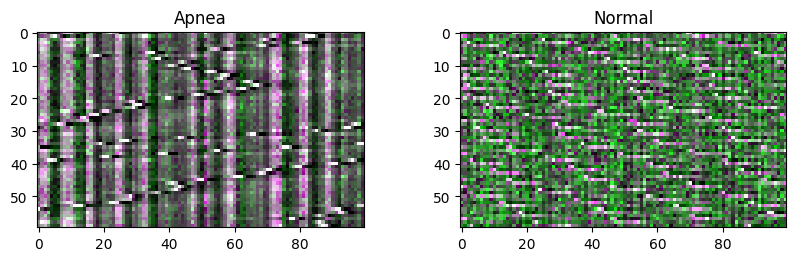

In [124]:
size = 10
for i in range(size):
    a = to_color(X_1[i])
    b = to_color(X_0[i])
    plt.figure(figsize=(10, 30))
    plt.subplot(size, 2, i*2+1)
    plt.title("Apnea")
    plt.imshow(a)
    plt.subplot(size, 2, i*2+2)
    plt.title("Normal")
    plt.imshow(b)
plt.show()